# Importing the Dependencies

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Data Collection and Processing

In [22]:
#Loading the csv data to a pandas Dataframe
gold_data=pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [23]:
#top 5 rows of the dataset

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [24]:
#last five rows of data-set

gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [25]:
#number of rows and column
gold_data.shape

(2290, 6)

In [26]:
#getting information about dataset

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [27]:
#getting the statistical measures about the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [28]:
#checking missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**Correlation among the predictive variables**

In [29]:
correlation=gold_data.corr(numeric_only=True)

<Axes: >

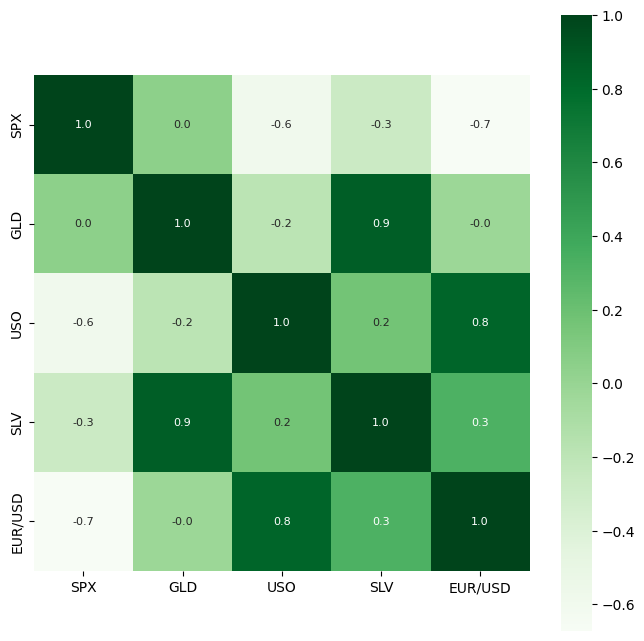

In [30]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [31]:
#correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

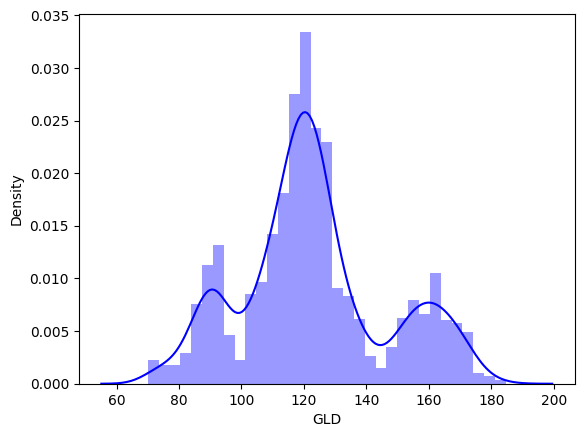

In [32]:
#checking the distribution of the Gold Price
sns.distplot(gold_data['GLD'],color='Blue')

# Splitting the Features and Target

In [33]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [34]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [35]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into Training data and Test data

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# Model Training:Random Forest Regressor

In [37]:
regressor=RandomForestRegressor(n_estimators=100)

In [38]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [39]:
#prediction on Test Data
test_data_prediction=regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[168.7843997   81.88719966 116.02760028 127.65660089 120.48380144
 154.75319759 150.14649848 126.08060025 117.51789884 126.10350042
 116.50610129 171.94630046 141.73109822 167.80359877 115.23960033
 118.1463006  138.43570267 170.48770118 159.0994027  160.0443998
 155.06920006 125.16860032 177.03439983 157.48770311 125.30320026
  93.9108998   77.27850027 120.67410012 119.12969991 167.35220085
  87.88370037 125.17479984  91.32940073 117.58050052 121.12899909
 135.63660073 115.76240085 114.86140079 149.8088007  107.07200115
 103.83360219  87.11899792 126.47140084 117.66559996 152.48389909
 119.69829989 108.3209001  107.86059788  93.0032004  127.00919841
  74.87240054 113.60459942 121.1969     111.39369956 118.99979907
 120.76759907 159.95050042 168.38310087 146.89789701  85.92159872
  94.40790036  86.85299905  90.48750021 118.93500053 126.46210055
 127.52819999 170.40509928 122.17239889 117.29089884  98.44810047
 167.74830145 143.40129841 131.62700194 121.10860224 120.67379959
 119.605000

In [41]:
# R squared error

error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error", error_score)

R squared error 0.9890182319769317


# Compare the Actual Values and Predicted Values in a Plot

In [42]:
Y_test=list(Y_test)

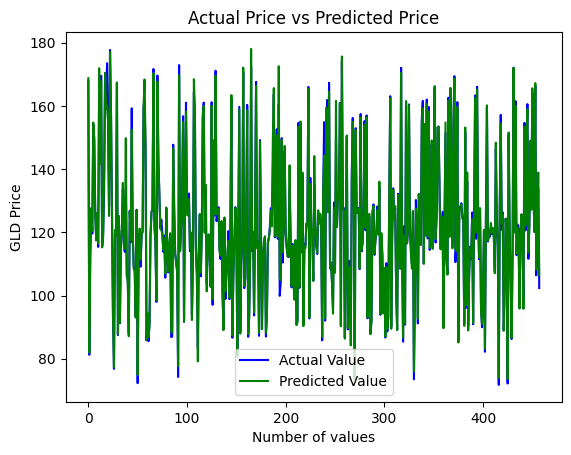

In [43]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()